# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


Text(0, 0.5, 'count')

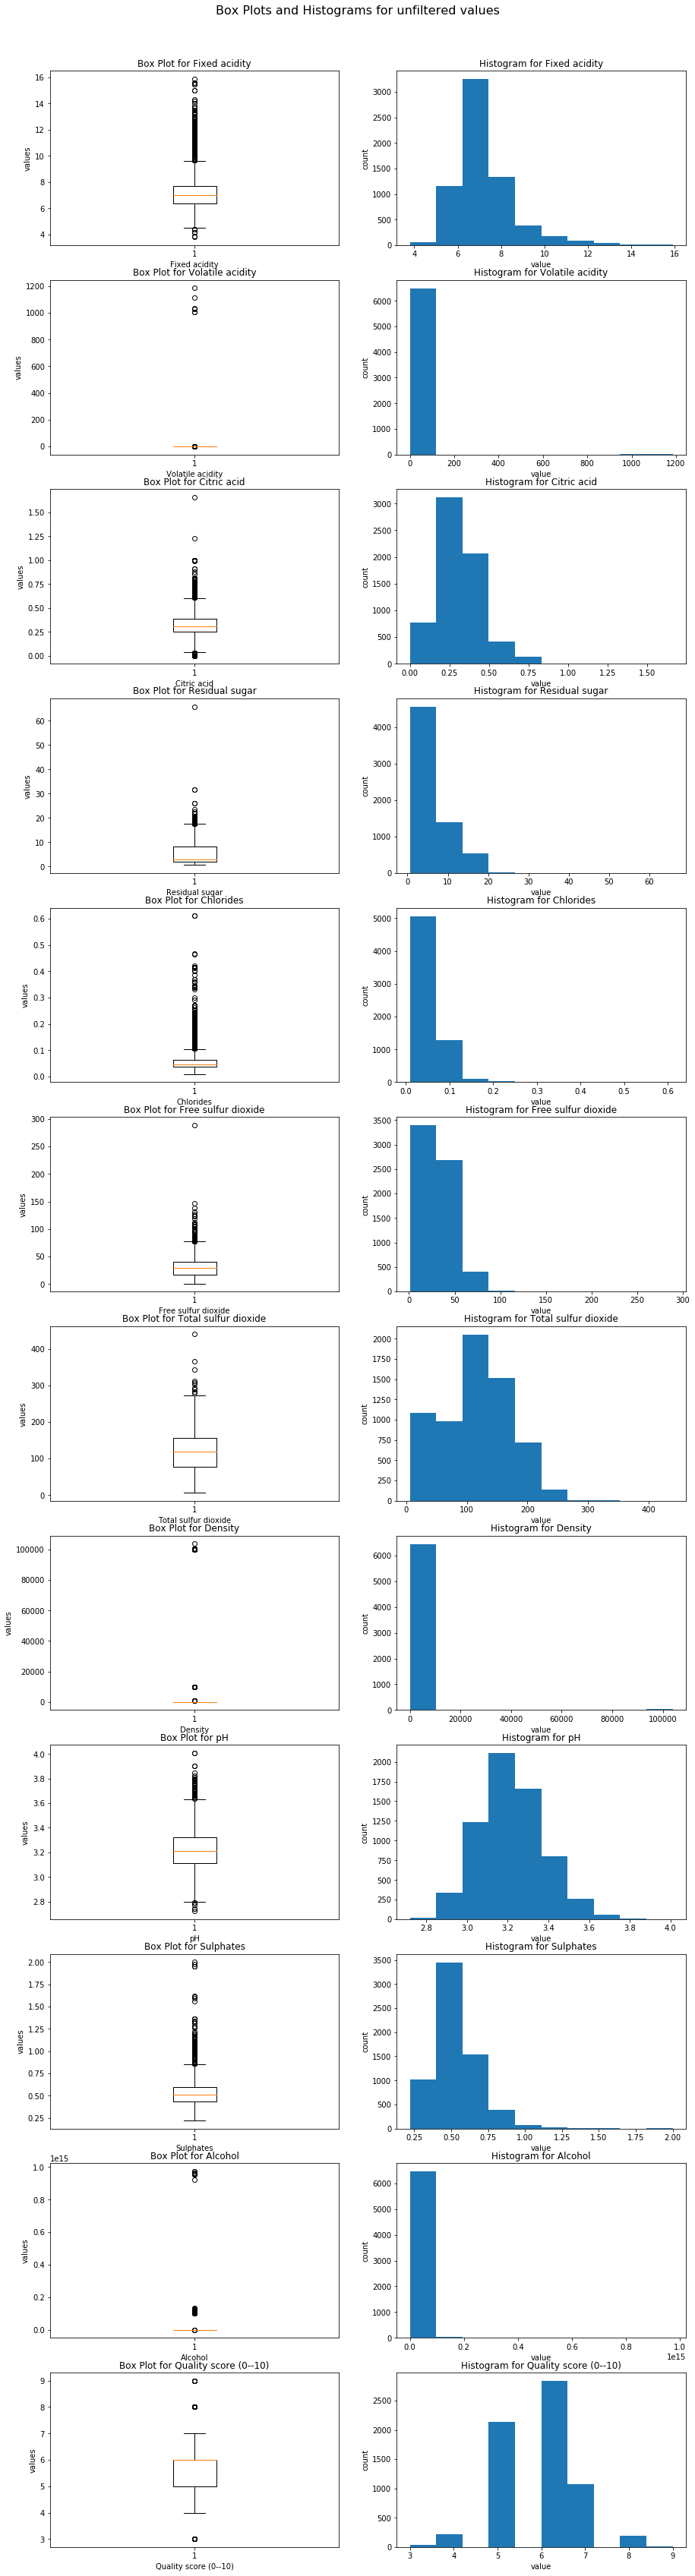

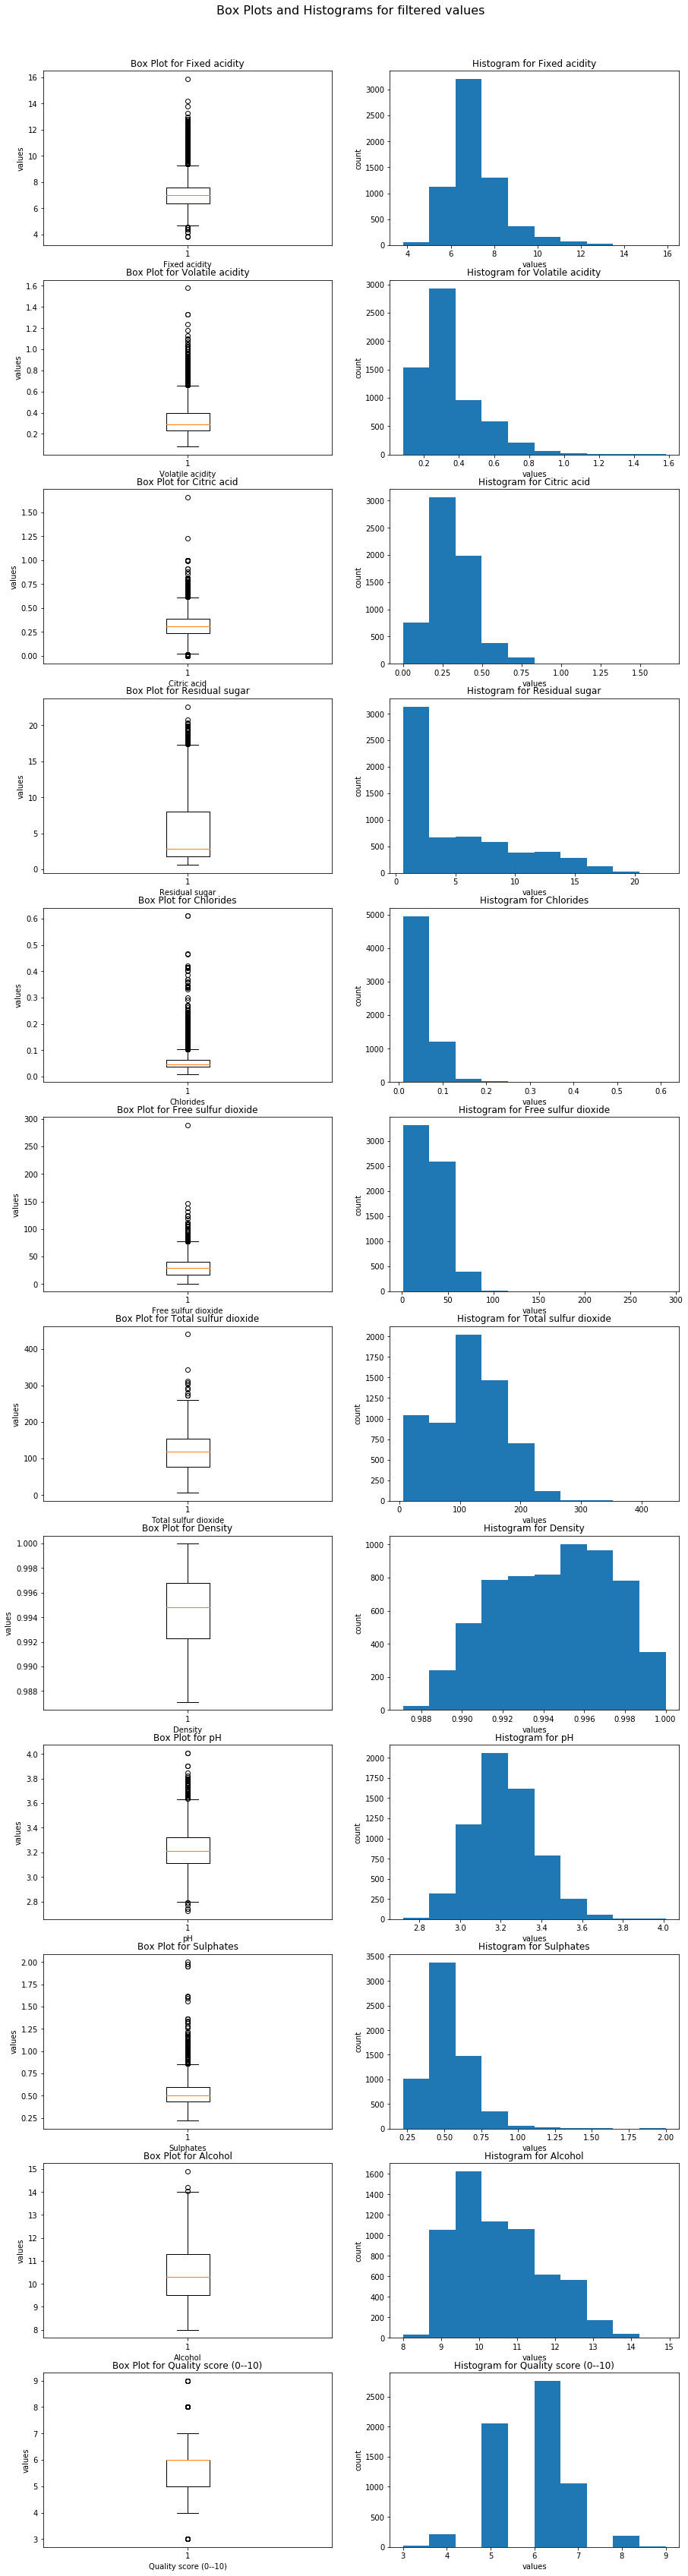

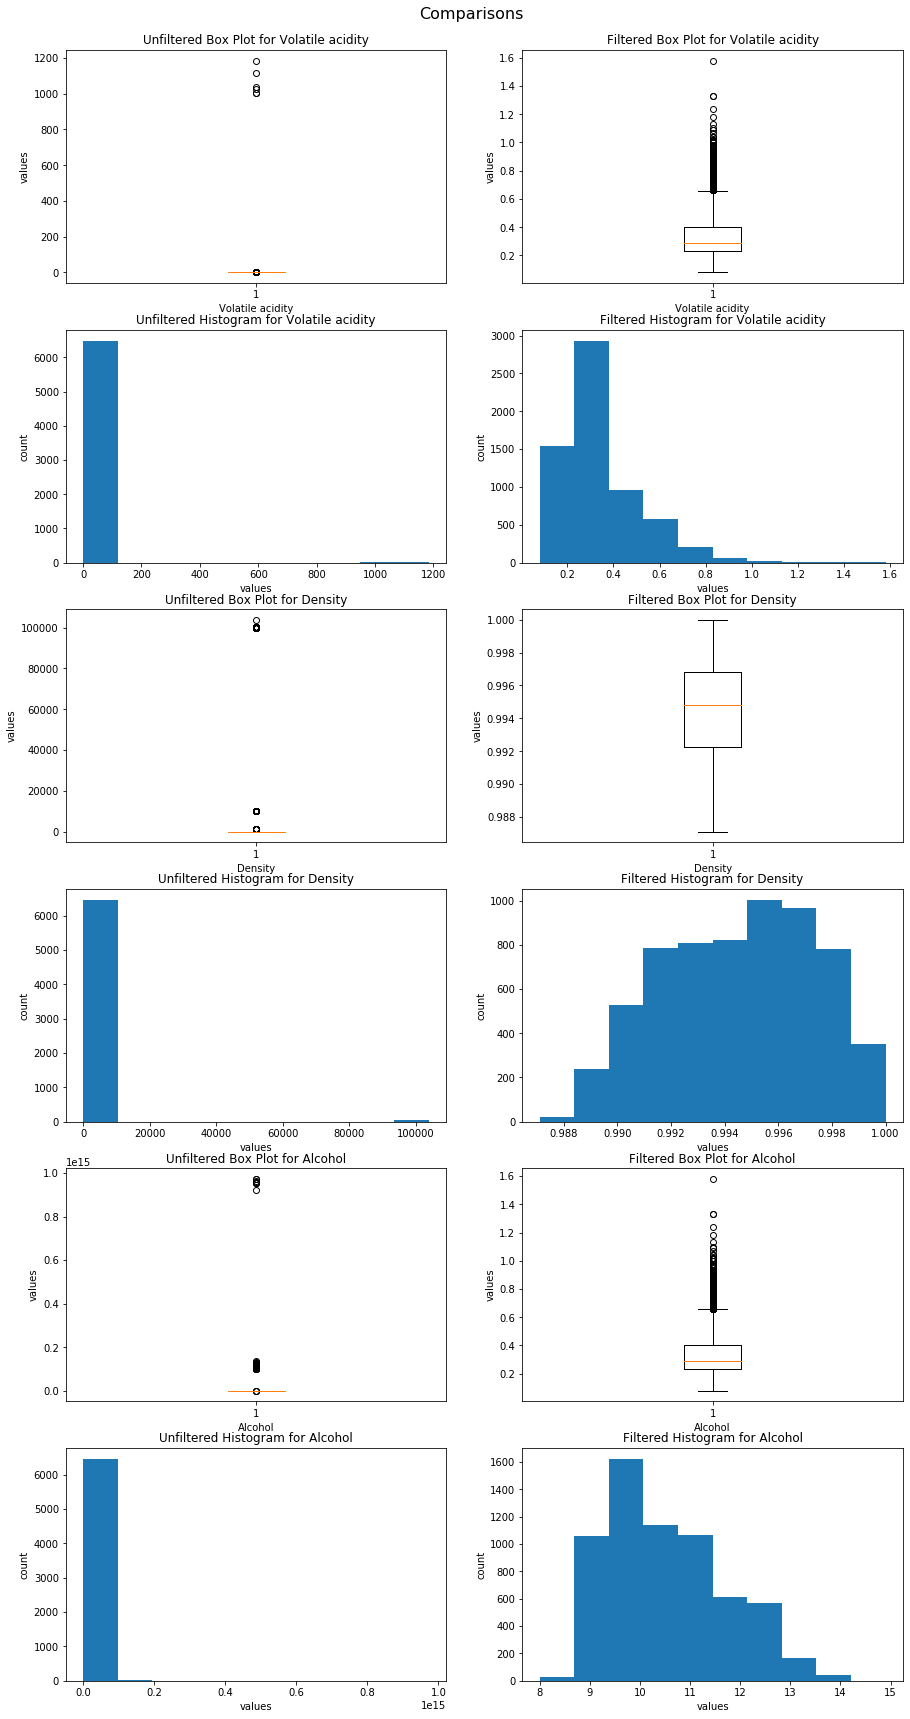

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

# extracting data
dictionary = sio.loadmat('Data/wine.mat')
columns = [dictionary['attributeNames'][0][x][0] for x in range(len(dictionary['attributeNames'][0]))]
data = [item for item in dictionary['X']]
df = pd.DataFrame(data, columns=columns)

# getting anf printing graphs for unfiltered values
f, arr = plt.subplots(12,2,figsize=(15,60))
f.suptitle('Box Plots and Histograms for unfiltered values', y=0.9, fontsize=16)

for i in range(len(columns)):
    arr[i][0].boxplot(df[columns[i]])
    arr[i][0].set_title('Box Plot for '+columns[i])
    arr[i][0].set_xlabel(columns[i])
    arr[i][0].set_ylabel('values')   
    arr[i][1].hist(df[columns[i]])
    arr[i][1].set_title('Histogram for '+columns[i])
    arr[i][1].set_xlabel('value')
    arr[i][1].set_ylabel('count')

# data filtering
data_filtered = []
for item in data:
    if (item[1] < 20.0 and item[7] < 10.0 and item[7] > 0.01 and item[10] < 200.0 and item[10] > 0.5):
      data_filtered.append(item)

# getting anf printing graphs for filtered values
df2 = pd.DataFrame(data_filtered, columns=columns)
f2, arr2 = plt.subplots(12,2,figsize=(15,60))
f2.suptitle('Box Plots and Histograms for filtered values', y=0.9, fontsize=16)

for i in range(len(columns)):
    arr2[i][0].boxplot(df2[columns[i]])
    arr2[i][0].set_title('Box Plot for '+columns[i])
    arr2[i][0].set_xlabel(columns[i])
    arr2[i][0].set_ylabel('values')   
    arr2[i][1].hist(df2[columns[i]])
    arr2[i][1].set_title('Histogram for '+columns[i])
    arr2[i][1].set_xlabel('values')
    arr2[i][1].set_ylabel('count')

# printing comparison graphs
f3, arr3 = plt.subplots(6,2,figsize=(15,30))
f3.suptitle('Comparisons', y=0.9, fontsize=16)
arr3[0][0].boxplot(df[columns[1]])
arr3[0][0].set_title('Unfiltered Box Plot for '+columns[1])
arr3[0][0].set_xlabel(columns[1])
arr3[0][0].set_ylabel('values')
arr3[0][1].boxplot(df2[columns[1]])
arr3[0][1].set_title('Filtered Box Plot for '+columns[1])
arr3[0][1].set_xlabel(columns[1])
arr3[0][1].set_ylabel('values')  
arr3[1][0].hist(df[columns[1]])
arr3[1][0].set_title('Unfiltered Histogram for '+columns[1])
arr3[1][0].set_xlabel('values')
arr3[1][0].set_ylabel('count')
arr3[1][1].hist(df2[columns[1]])
arr3[1][1].set_title('Filtered Histogram for '+columns[1])
arr3[1][1].set_xlabel('values')
arr3[1][1].set_ylabel('count')

arr3[2][0].boxplot(df[columns[7]])
arr3[2][0].set_title('Unfiltered Box Plot for '+columns[7])
arr3[2][0].set_xlabel(columns[7])
arr3[2][0].set_ylabel('values')
arr3[2][1].boxplot(df2[columns[7]])
arr3[2][1].set_title('Filtered Box Plot for '+columns[7])
arr3[2][1].set_xlabel(columns[7])
arr3[2][1].set_ylabel('values')  
arr3[3][0].hist(df[columns[7]])
arr3[3][0].set_title('Unfiltered Histogram for '+columns[7])
arr3[3][0].set_xlabel('values')
arr3[3][0].set_ylabel('count')
arr3[3][1].hist(df2[columns[7]])
arr3[3][1].set_title('Filtered Histogram for '+columns[7])
arr3[3][1].set_xlabel('values')
arr3[3][1].set_ylabel('count')

arr3[4][0].boxplot(df[columns[10]])
arr3[4][0].set_title('Unfiltered Box Plot for '+columns[10])
arr3[4][0].set_xlabel(columns[10])
arr3[4][0].set_ylabel('values')
arr3[4][1].boxplot(df2[columns[1]])
arr3[4][1].set_title('Filtered Box Plot for '+columns[10])
arr3[4][1].set_xlabel(columns[10])
arr3[4][1].set_ylabel('values')  
arr3[5][0].hist(df[columns[10]])
arr3[5][0].set_title('Unfiltered Histogram for '+columns[10])
arr3[5][0].set_xlabel('values')
arr3[5][0].set_ylabel('count')
arr3[5][1].hist(df2[columns[10]])
arr3[5][1].set_title('Filtered Histogram for '+columns[10])
arr3[5][1].set_xlabel('values')
arr3[5][1].set_ylabel('count')

----

Comparing the box plots and histograms of unfiltered versus filtered data shows these results:
* there has been a number of data points with relatively very high volatile acidity (900-1200) causing the unfiltered data to provide little useful information in the structure of relevant data points
* a similar observation can be made about data points in density, where there is a number of data points with extremely high density values (100 000, which is 100 000 times higher than the expected maximum value)
* on the other hand, the observation that can be made from alcohol content box plots and histograms is that there has been a high number of data points with low or no alcohol content while the expected minumum value was approximately 50 times higher; this yields the same implications as examples above

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----

Because even a single very different value (very small or bery big) can shift the entire mean way towards smaller or higher value than the real value is. Of course, this then affects creation of data groups, where there are then mainly two groups, one small one consisting of the outliers and a huge one consisting of real values. Such grouping is of course more or less useless.

----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

Fixed acidity and Quality score (0--10) association strength -0.07668526520453652
Volatile acidity and Quality score (0--10) association strength -0.26230590578350776
Citric acid and Quality score (0--10) association strength 0.0890221181546118
Residual sugar and Quality score (0--10) association strength -0.03215392730963386
Chlorides and Quality score (0--10) association strength -0.19914164479762572
Free sulfur dioxide and Quality score (0--10) association strength 0.05516006485585848
Total sulfur dioxide and Quality score (0--10) association strength -0.03971034037910721
Density and Quality score (0--10) association strength -0.3196176972872714
pH and Quality score (0--10) association strength 0.02030807915814118
Sulphates and Quality score (0--10) association strength 0.03798453783414721
Alcohol and Quality score (0--10) association strength 0.4495415274503276


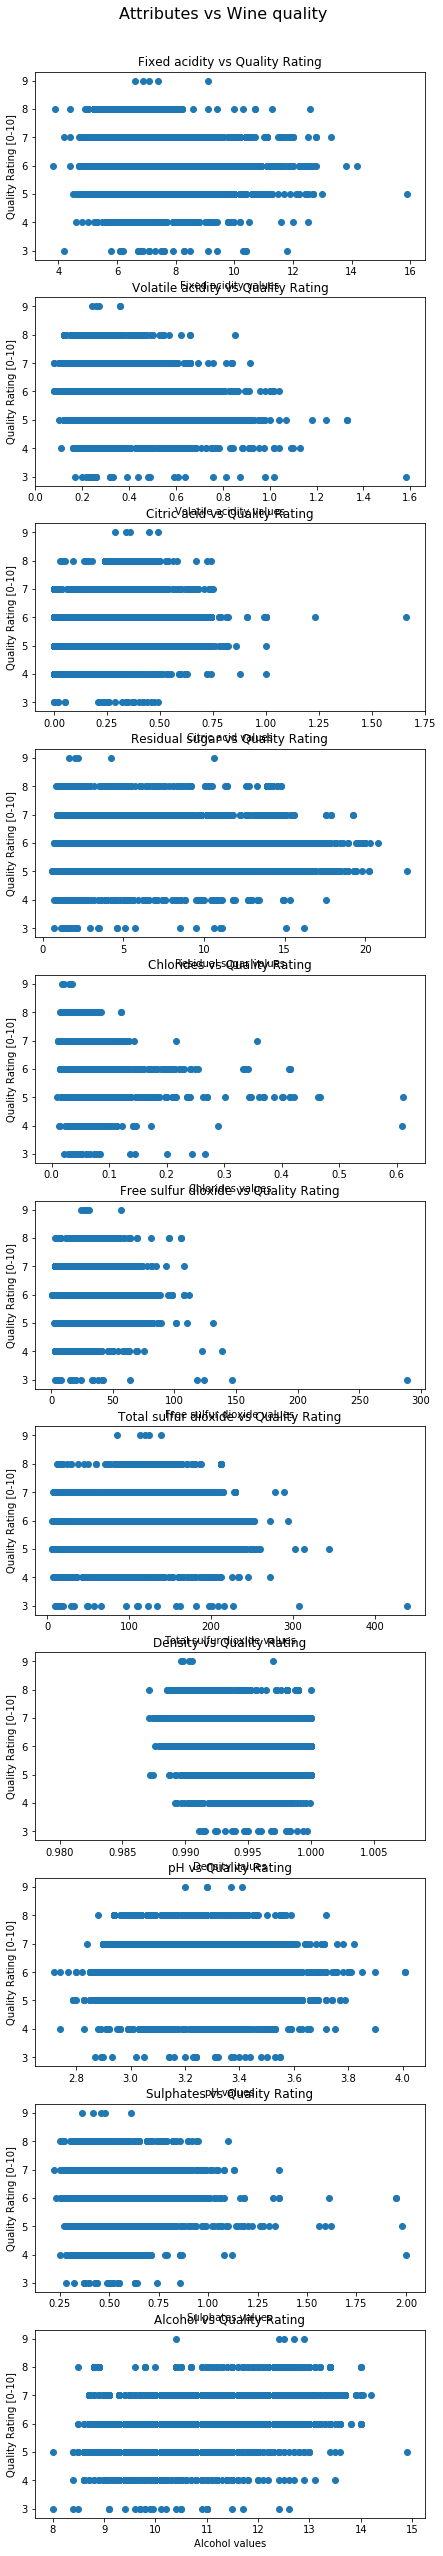

In [5]:
from scipy import stats as scs

# getting and printing Pearson's R coefficient
for i in range(len(columns)-1):
    a = scs.pearsonr(df2[columns[i]],df2[columns[11]])[0]
    print(columns[i]+' and '+columns[11]+' association strength '+str(a))

# getting and printing scatter graphs
f4, arr4 = plt.subplots(11,figsize=(7,45))
f4.suptitle('Attributes vs Wine quality', y=0.9, fontsize=16)
for i in range(len(columns)-1):
    arr4[i].scatter(df2[columns[i]],df2[columns[11]])
    arr4[i].set_title(columns[i]+' vs Quality Rating')
    arr4[i].set_xlabel(columns[i]+' values')
    arr4[i].set_ylabel('Quality Rating [0-10]')

----

Using the scatter graphs and Pearson's R coefficient, these observation on the associations of different attributes with wine quality can be made:
* Alcohol content has the highest correlation with quality rating. It is possitive which means "the higher the alcohol content, the better the quality"
* There is a relatively strong negative correlation between density and quality rating. In plain language, it means "the lower the density, the higher the quality"
* Other relatively strong negative correlations are between volatile acidity and quality rating and chlorides and quality rating
* Attributes fixed acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, pH and sulphates do not have a high impact on the wine quality as their R coefficients are relatively close to zero which indicates no correlation

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


Text(0.5, 0, 'PC 3')

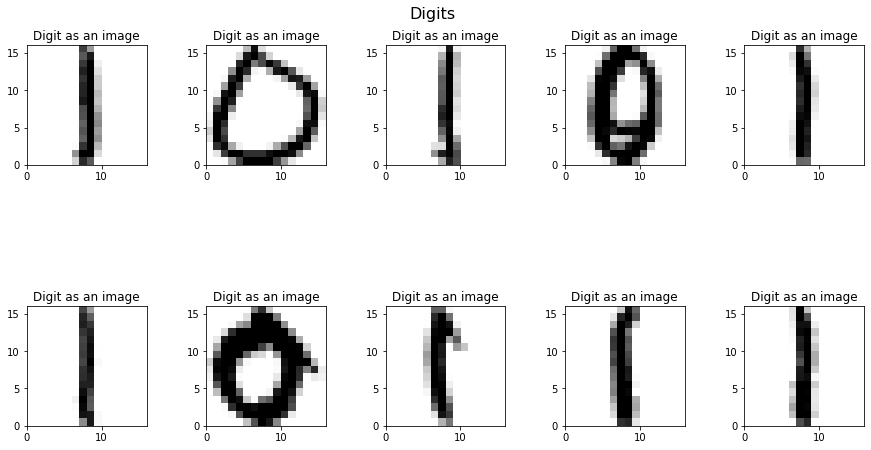

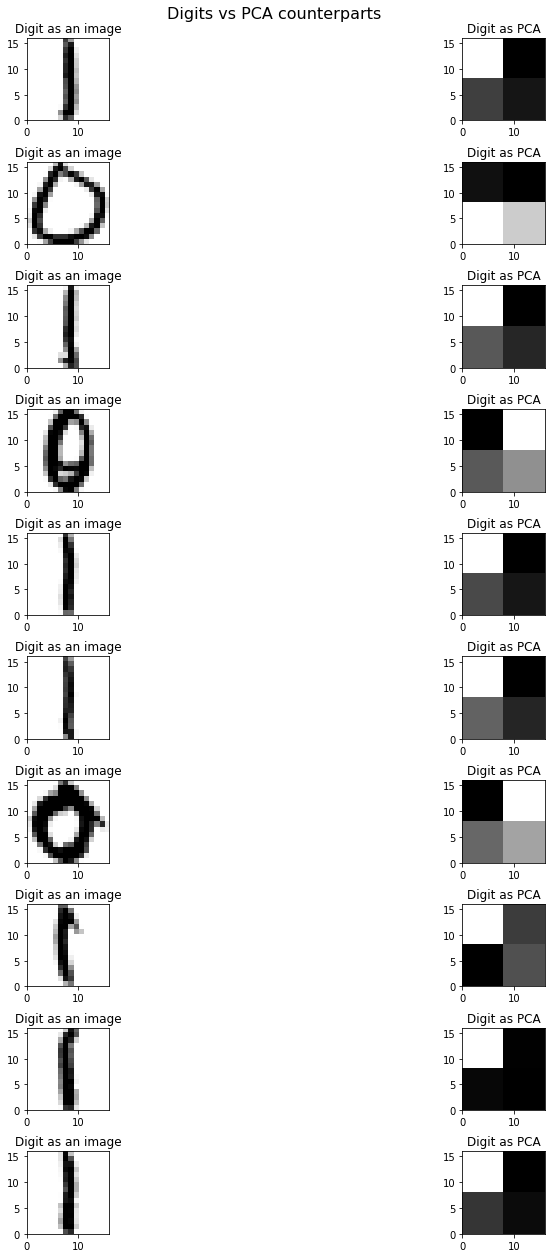

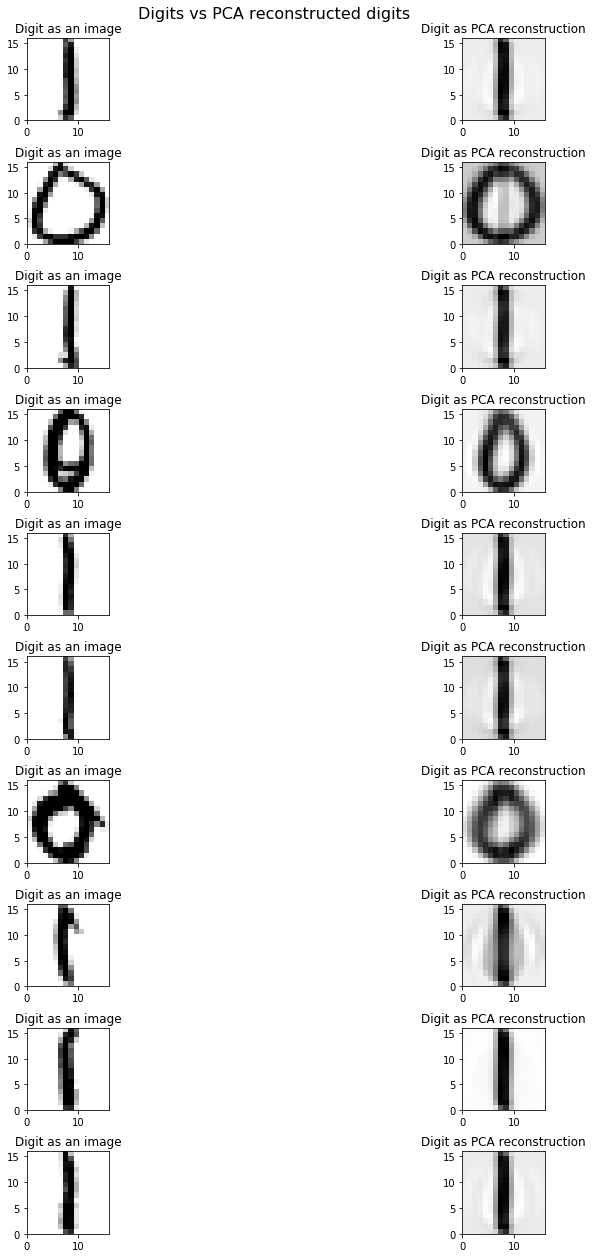

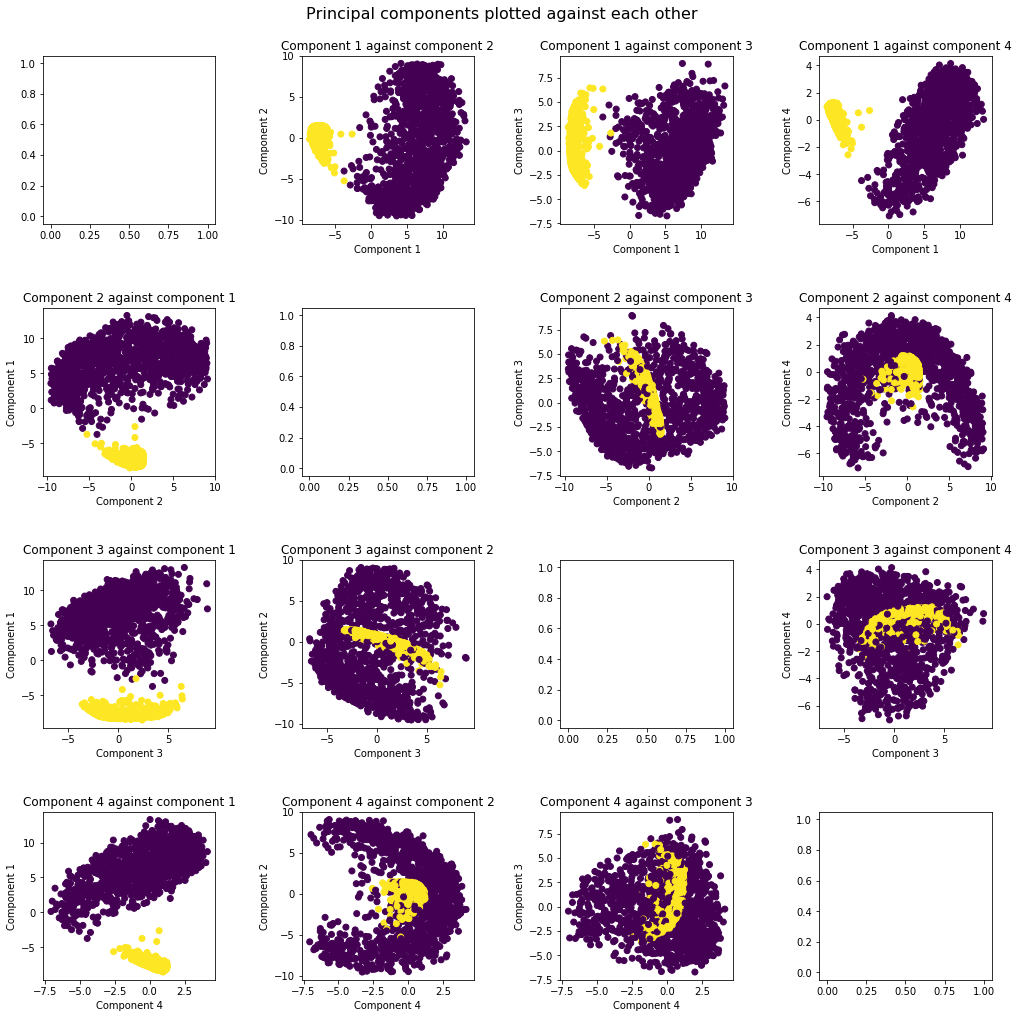

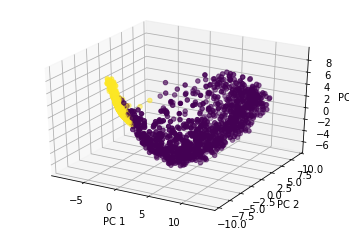

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape
import numpy as np

# loading
mat_data = loadmat('./Data/zipdata.mat')

# extracting relevant data
traindata = mat_data['traindata']
X = []
classes = []
for item in traindata:
    if item[0] == 0. or item[0] == 1.:
        X.append(item[1:])
        classes.append(item[0])

# printing
f, a = plt.subplots(2,5,figsize=(15,8))
f.suptitle('Digits', y=0.9, fontsize=16)
for i in range(10):
    I = reshape(X[i],(16,16))
    y = 0
    if i>=5:
        y = 1
    a[y][i%5].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    a[y][i%5].set_title('Digit as an image')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

# PCA
X = np.asarray(X)

# PCA mean centering
u = np.array(X.mean(axis=0)).reshape(1,-1)
n = X.shape[0]
N = np.ones((n,1))
Y = X - (np.dot(N,u))

# PCA decomposition
U, s, VT = np.linalg.svd(Y)
V = VT.T

# PCA reduction
Z = np.dot(Y,V[:,:4])

# graphs of digits and PCA representations
f2, a2 = plt.subplots(10,2,figsize=(13,22))
f2.suptitle('Digits vs PCA counterparts', y=0.9, fontsize=16)
for i in range(10):
    I = reshape(X[i],(16,16))
    J = reshape(Z[i],(2,2))
    a2[i][0].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    a2[i][0].set_title('Digit as an image')
    a2[i][1].imshow(J, extent=(0,16,0,16), cmap=cm.gray_r)
    a2[i][1].set_title('Digit as PCA')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

# value reconstruction *W** = Z*V[:,:4]T + μ. *
W = np.dot(Z,np.transpose(V[:,:4]))+u

# graphs of digits and PCA reconstruction
f3, a3 = plt.subplots(10,2,figsize=(13,22))
f3.suptitle('Digits vs PCA reconstructed digits', y=0.9, fontsize=16)
for i in range(10):
    I = reshape(X[i],(16,16))
    J = reshape(W[i],(16,16))
    a3[i][0].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    a3[i][0].set_title('Digit as an image')
    a3[i][1].imshow(J, extent=(0,16,0,16), cmap=cm.gray_r)
    a3[i][1].set_title('Digit as PCA reconstruction')
plt.subplots_adjust(wspace=0.5,hspace=0.5)

# graphs of PC plotting
f4, a4 = plt.subplots(4,4,figsize=(17,17))
colors = ['#2300A8', '#00A658']
f4.suptitle('Principal components plotted against each other', y=0.92, fontsize=16)
for i in range(4):
    for j in range(4):
        if i == j:
            a4[i][j].plot()
        else:
            a4[i][j].scatter(Z[:,i],Z[:,j],c=classes,cmap=cm.viridis)
            a4[i][j].set_xlabel('Component '+str(i+1))
            a4[i][j].set_ylabel('Component '+str(j+1))
            a4[i][j].set_title('Component '+str(i+1)+' against component '+str(j+1))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

from mpl_toolkits.mplot3d import Axes3D
# 3d scatter of 1st 3 PCs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[:,0],Z[:,1],Z[:,2],c=classes,cmap=cm.viridis)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

----

7.) It does not seem to matter whichever PCs are plotted against each other, the classes of data are always quite separated. 

However, the separation is significantly cleaner when plotting PC 1 with another PC, as in plotting PC 1 against PC 3. The bigger the index number of the compared PCs, the less cleaner the separation - e.g. PC 3 against PC 4

When plotting the PCs against each other, switching the positions of the PCs (the one from x axis moves to the y axis and vice versa), no significant effect takes place - the values are simply rotated differently.

Note: Sorry for the missing legends, I could not get it working.

----



## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [7]:
import numpy as np
limbs = np.array([2,3,6,8,11,18])
mean = limbs.mean()
print(mean)
std = limbs.std()
print(std)

8.0
5.385164807134504


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [8]:
import itertools as it
samples2 = it.combinations(limbs,2)
samples4 = it.combinations(limbs,4)
mean2 = []
mean4 = []
print('List of samples of 2')
for i in samples2:
    print(i)       
    mean = np.asarray(i).mean()
    mean2.append(mean)
    print('mean: '+str(mean))
print('List of samples of 4')
for i in samples4:
    print(i)
    mean = np.asarray(i).mean()
    mean4.append(mean)
    print('mean: '+str(mean))

List of samples of 2
(2, 3)
mean: 2.5
(2, 6)
mean: 4.0
(2, 8)
mean: 5.0
(2, 11)
mean: 6.5
(2, 18)
mean: 10.0
(3, 6)
mean: 4.5
(3, 8)
mean: 5.5
(3, 11)
mean: 7.0
(3, 18)
mean: 10.5
(6, 8)
mean: 7.0
(6, 11)
mean: 8.5
(6, 18)
mean: 12.0
(8, 11)
mean: 9.5
(8, 18)
mean: 13.0
(11, 18)
mean: 14.5
List of samples of 4
(2, 3, 6, 8)
mean: 4.75
(2, 3, 6, 11)
mean: 5.5
(2, 3, 6, 18)
mean: 7.25
(2, 3, 8, 11)
mean: 6.0
(2, 3, 8, 18)
mean: 7.75
(2, 3, 11, 18)
mean: 8.5
(2, 6, 8, 11)
mean: 6.75
(2, 6, 8, 18)
mean: 8.5
(2, 6, 11, 18)
mean: 9.25
(2, 8, 11, 18)
mean: 9.75
(3, 6, 8, 11)
mean: 7.0
(3, 6, 8, 18)
mean: 8.75
(3, 6, 11, 18)
mean: 9.5
(3, 8, 11, 18)
mean: 10.0
(6, 8, 11, 18)
mean: 10.75


> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [9]:
import itertools as it
import math

# combinations
samples2 = it.combinations(limbs,2)
samples4 = it.combinations(limbs,4)
mean2 = []
mean4 = []
for i in samples2:
    mean = np.asarray(i).mean()
    mean2.append(mean)
for i in samples4:
    mean = np.asarray(i).mean()
    mean4.append(mean)

#means and stds x
mx2 = np.asarray(mean2).mean()
print('mx2: '+str(mx2))
stdx2 = np.asarray(mean2).std()
print('stdx2: '+str(stdx2))
mx4 = np.asarray(mean4).mean()
print('mx4: '+str(mx4))
stdx4 = np.asarray(mean4).std()
print('stdx4: '+str(stdx4))

# central limit theorem verification
mean = limbs.mean()
std = limbs.std()
print('mean == mx2 == mx4')
print(mean == mx2 == mx4)
s = std / math.sqrt(len(limbs))
print('STD / sqrt(N): '+str(s)+', stdx2: '+str(stdx2), ', stdx4: '+str(stdx4))
print('differences: '+str(stdx2-s)+' and '+str(s-stdx4))

mx2: 8.0
stdx2: 3.40587727318528
mx4: 8.0
stdx4: 1.70293863659264
mean == mx2 == mx4
True
STD / sqrt(N): 2.19848432637882, stdx2: 3.40587727318528 , stdx4: 1.70293863659264
differences: 1.20739294680646 and 0.4955456897861801


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

----

As visible in the code above, means are equal but the stds are not

----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

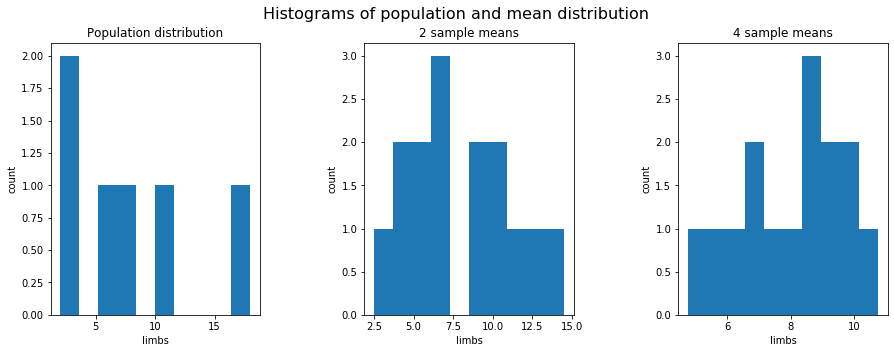

In [10]:
import matplotlib.pyplot as plt

# combinations
samples2 = it.combinations(limbs,2)
samples4 = it.combinations(limbs,4)
mean2 = []
mean4 = []
for i in samples2:
    mean = np.asarray(i).mean()
    mean2.append(mean)
for i in samples4:
    mean = np.asarray(i).mean()
    mean4.append(mean)


# graphs
f, arr = plt.subplots(1,3,figsize=(15,5))
f.suptitle('Histograms of population and mean distribution', y=0.98, fontsize=16)

arr[0].hist(limbs)
arr[0].set_title('Population distribution')
arr[0].set_xlabel('limbs')
arr[0].set_ylabel('count')

arr[1].hist(mean2)
arr[1].set_title('2 sample means')
arr[1].set_xlabel('limbs')
arr[1].set_ylabel('count')

arr[2].hist(mean4)
arr[2].set_title('4 sample means')
arr[2].set_xlabel('limbs')
arr[2].set_ylabel('count')

plt.subplots_adjust(wspace=0.5,hspace=0.5)

----


----